In [99]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

# tasks a-c

I created only one figure (for task3.c) not to generate additional mess

In [8]:
G = nx.barabasi_albert_graph(100, 10)

In [11]:
img_e = mpimg.imread('great_leader.jpg')
img_o = mpimg.imread('capitalist.jpg')

Inspired by https://gist.github.com/shobhit/3236373

Since figures are quite large I recommend opening saved graph with IrfanView (or some other graphics viewer)

Images used by me as well as generated graph is available at https://drive.google.com/open?id=16EK8pX37PzVVHwQk57QYwnqO9bKXfWAB
in 'list2' directory

In [12]:
# nice layout
pos=nx.kamada_kawai_layout(G)
plt.figure(figsize=(300,300))

#draw network
nx.draw_networkx(G,pos,node_size=0.1)

# add images on nodes

# get axes from nx.draw...
ax=plt.gca()
# get figure from nx.draw...
fig=plt.gcf()

# transformation objects for nice plots 
trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

for n in G.nodes():
    (x,y) = pos[n]
    
    # transform coordinates of layout to coordinates on figure
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    
    # size of image based on degree. 0.001 works well for images 256x256 px
    degree = len(list(G.neighbors(n)))
    imsize = 0.001*degree
    
    # position of current image
    a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    
    # choose image based on degree
    if degree%2 == 0:
        a.imshow(img_e)
    else:
        a.imshow(img_o)
        
    # equal scaling of data on axes
    a.set_aspect('equal')
    a.axis('off')

plt.savefig('save.png') 
plt.close(fig) #do not show figure (takes too much time)

# tasks d-f

In [101]:
G = nx.barabasi_albert_graph(10e3, 4)

In [102]:
def calc_distr(G):
    degrees = []
    probs = []

    distr = {}
    for node in G.nodes():
        distr.setdefault(len(list(G.neighbors(node))), 0)
        distr[len(list(G.neighbors(node)))] += 1

    cnt = sum(distr.values())

    degrees = [i for i in distr.keys()]
    probs = [distr[i]/cnt for i in degrees]
    
    return degrees, probs

d, p = calc_distr(G)

(array([0.00426384, 0.00994895, 0.00994895, 0.00994895, 0.00994895,
        0.00994895, 0.00852767, 0.00994895, 0.00994895, 0.00710639,
        0.00852767, 0.00568511, 0.00426384, 0.00426384, 0.00284256,
        0.00142128, 0.00426384, 0.00142128, 0.00426384, 0.00142128,
        0.00142128, 0.        , 0.        , 0.00284256, 0.        ,
        0.00284256, 0.00142128, 0.        , 0.00142128, 0.00142128,
        0.        , 0.00142128, 0.00142128, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00142128, 0.        , 0.00142128]),
 array([  0.        ,   6.89795918,  13.79591837,  20.69387755,
         27.59183673,  34.48979592,  41.3877551 ,  48.28571429,
         55.18367347,  62.08163265,  68.97959184,  75.87755102,
         82.7755102 ,  89.67346939,  96.57142857, 103.46938776,
        110.36734694, 117.26530612, 124.16326531, 131.06122449,
        13

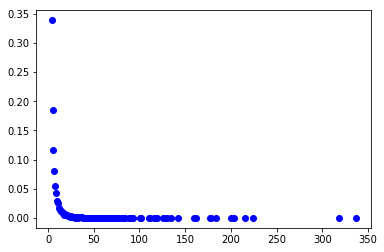

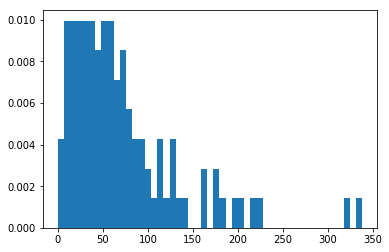

In [103]:
# degree distribution
plt.figure()
plt.plot(d, p, 'bo')

plt.figure()
plt.hist(d,bins=np.linspace(0,np.amax(d)+1, 50), density=True)

In [104]:
from IPython.display import display, clear_output

def paths(G):
    clear_output(wait=True)
    display('start')
    
    sp = nx.shortest_path(G)

    dists = {}
    for i, node_paths in enumerate(sp.values()):
        clear_output(wait=True)
        display(str(i))
        
        for path in node_paths.values():
            dists.setdefault(len(path)-1,0)
            dists[len(path)-1] += 1

    clear_output(wait=True)
    display('finalizing')
    
    cnt = sum(dists.values())
    degrees = [i for i in dists.keys()]
    probs = [dists[i]/cnt for i in degrees] 
    
    clear_output(wait=True)
    display('end')
    return dists, degrees, probs

In [106]:
start = time.time()
ps = list(paths(G))
print(time.time() -start)

'end'

684.3063862323761


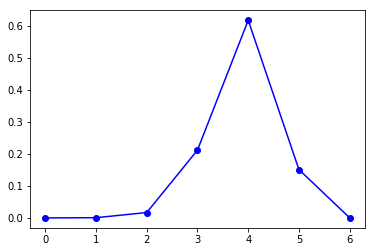

In [107]:
plt.figure()
plt.plot(ps[1], ps[2], 'bo-')

In [108]:
def clust(G):
    counts = []
    
    for node in G.nodes():
        connections = 0
        set_of_neighbors = set(G.neighbors(node))
        
        for neighbor in set_of_neighbors:
            for neighbor_of_neighbor in G.neighbors(neighbor):
                if neighbor_of_neighbor in set_of_neighbors:
                    connections += 1

        counts.append([connections, len(set_of_neighbors)])
    
    coefficients_counts = {}
    for item in counts:
        if item[1] == 1:
            continue
        c = item[0]/(item[1]*(item[1]-1))
        coefficients_counts.setdefault(c, 0)
        coefficients_counts[c] += 1
        
    return coefficients_counts
    

In [109]:
coefficients_counts = clust(G)
from more_itertools import sort_together
x = [item[0] for item in coefficients_counts.items()]
y = [item[1] for item in coefficients_counts.items()]
sum_y = sum(y)
y_d = [i/sum_y for i in y]
x, y_d, y = sort_together([x,y_d, y])

(array([8.43269622e+01, 1.47315982e+00, 9.79056527e-01, 6.95404636e-01,
        7.41154941e-01, 1.83001220e-02, 8.60105734e-01, 0.00000000e+00,
        9.05856039e-01]),
 array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
        0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ]),
 <a list of 9 Patch objects>)

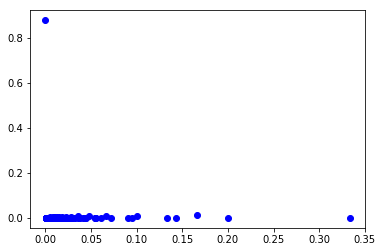

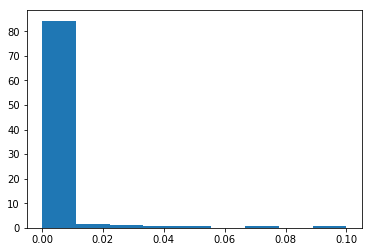

In [119]:
plt.plot(x,y_d,'bo')
plt.figure()
for_hist = [[x]*y for x,y in zip(x,y)]
num_bins = 10
plt.hist([j for i in for_hist for j in i], bins=np.linspace(0,np.amax(for_hist[0])+0.1, num_bins), density=True)